In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def get_lines(filename):
	lines = []
	file = open(filename, 'r')
	line = file.readline()
	while line:
		lines.append(line.split())
		line = file.readline()
	return lines

def frange(start,stop, step=1.0):
    while start < stop:
        yield start
        start +=step

def frange_(start, stop, step = 1.0):
    l = []
    i = 0
    while start+i <= stop:
      l.append(start+i)
      i += step
    
    return l

def draw_throughput(traces):
    
    traces[1] = traces[1].astype(float)

    # Packet Size
    traces = traces[~traces[7].isin(['message','{1:first_message}','{2:second_message}','redundant'])]
    traces[7] = traces[7].astype(int)

    throughput = []

    for second in range(0,100,1):
      throughput.append(traces[(traces[1] <= second) & (traces[1] >= second-1)][7].sum())
    
    plt.figure(figsize=(8,5))
    plt.plot(throughput)
    plt.xlabel("time") 
    plt.ylabel("Throughput") 
    plt.title("Throughput per second") 
    plt.show()

def calculate_packet_transfer_ratio(traces):
    pckt_transfer_ratio = traces[6].value_counts()['received']/(traces[6].value_counts()['sending'])
    print("Packet Transfer Ratio: ", pckt_transfer_ratio*100 ,'%')

def calculate_avg_delay(traces):
    total = 0
    for i in range(0,100):
        received_time = df[(df[6] == 'received') & (df[7] == '{1:first_message}')][1].iloc[i]
        send_time = df[(df[6] == 'sending') & (df[8] == '1}}')][1].iloc[i]

        total += float(received_time) - float(send_time)

    print("Avg. end-to-end delay for sending data from A to L",total/100)

    total = 0
    for i in range(0,100):
        received_time = df[(df[6] == 'received') & (df[7] == '{2:second_message}')][1].iloc[i]
        send_time = df[(df[6] == 'sending') & (df[8] == '2}}')][1].iloc[i]

        total += float(received_time) - float(send_time)

    print("Avg. end-to-end delay for sending data from D to H",total/100)

def trace_info(trace):
    draw_throughput(trace)

    calculate_packet_transfer_ratio(trace)

    calculate_avg_delay(trace)


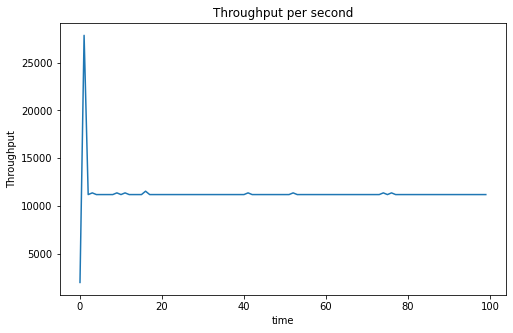

Packet Transfer Ratio:  50.0 %
Avg. end-to-end delay for sending data from A to L 25.0097333493044
Avg. end-to-end delay for sending data from D to H 25.0042619465071


In [ ]:
trace_info(pd.DataFrame(get_lines('rts-cts-data-ack_1.5Mbps.tr')))

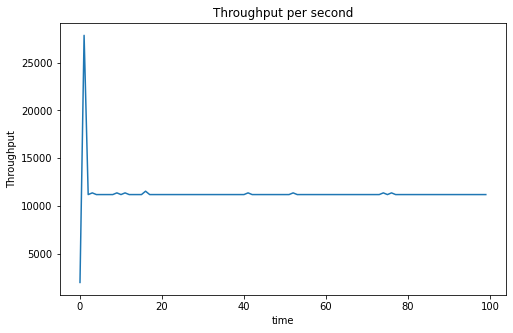

Packet Transfer Ratio:  49.75124378109453 %
Avg. end-to-end delay for sending data from A to L 25.0097333493044
Avg. end-to-end delay for sending data from D to H 25.0042619465071


In [ ]:
trace_info(pd.DataFrame(get_lines('rts-cts-data-ack_55Mbps.tr')))

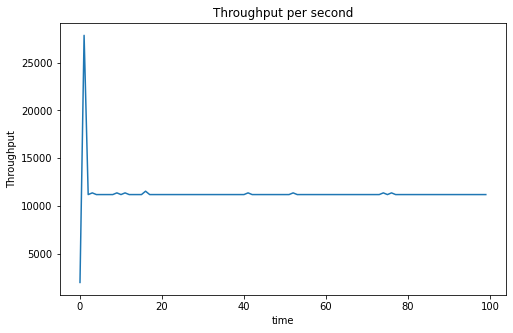

Packet Transfer Ratio:  49.75124378109453 %
Avg. end-to-end delay for sending data from A to L 25.0097333493044
Avg. end-to-end delay for sending data from D to H 25.0042619465071


In [ ]:
trace_info(pd.DataFrame(get_lines('rts-cts-data-ack_155Mbps.tr')))

In [ ]:
df = pd.DataFrame(get_lines('rts-cts-data-ack_1.5Mbps.tr'))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,v,0,eval,{set,sim_annotation,{0,sending,message,1}},None,None,None,None,None,None,None,None
1,s,0.000000000,_0_,AGT,---,0,message,500,[0,0,0,0],-------,[0:8,7:7,32,0]
2,s,0.000000000,_0_,AGT,---,1,message,500,[0,0,0,0],-------,[0:8,8:7,32,0]
3,v,0,eval,{set,sim_annotation,{3,sending,message,2}},None,None,None,None,None,None,None,None
4,s,0.000000000,_3_,AGT,---,2,message,500,[0,0,0,0],-------,[3:8,7:8,32,0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,s,99.022825073,_8_,MAC,---,0,ACK,38,[0,0,0,0],None,None,None,None,None
4784,r,99.022840073,_8_,AGT,---,405,message,500,[13a,8,0,800],-------,[0:8,8:7,32,0]
4785,v,99.022840072534308,eval,{set,sim_annotation,{8,received,{1:first_message},from,0}},None,None,None,None,None,None,None
4786,v,99.022840072534308,eval,{set,sim_annotation,{8,sending,message,1}},None,None,None,None,None,None,None,None
